<a href="https://colab.research.google.com/github/AtharKharal/Tensorflow_Python_GPUsTPUs/blob/master/Tensorflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Tensorflow

In [0]:
import tensorflow as tf

#Basic Tensor Constructions

In [0]:
t1= tf.constant([1,2,3.3])
t2= tf.constant([10,20,30])


In [0]:
t3= tf.range(1,10,.3)


In [0]:
t1.get_shape()

TensorShape([Dimension(3)])

#Creating Operations

In [0]:
a = tf.constant([3., 3., 3.])
b = tf.constant([2., 2., 2.])
sm = tf.add(a, b)

In [0]:
dv= tf.div(a,b)
dv

<tf.Tensor 'div:0' shape=(3,) dtype=float32>

In [0]:
tf.subtract(a,b)

<tf.Tensor 'Sub:0' shape=(3,) dtype=float32>

In [0]:
with tf.Session() as sess:
    print("Sum : ", sess.run(sm))

Sum :  [5. 5. 5.]


##Graphs

In [0]:
graph= tf.get_default_graph()
graph

In [0]:
newgraph= tf.Graph()
newgraph

In [0]:
newgraph.get_operations()

[]

In [0]:
a=tf.constant(2.5,name='first_val')
b=tf.constant(4.5,name='second_val')
sm=a+b
print(tf.get_default_graph().get_operations())

#Linear Regression: the TF way

We start by loading the necessary libraries, creating a graph, and loading the data:

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

We then declare our learning rate, batch size, placeholders, and model variables:

In [0]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))


Next, we write the formula for the linear model, y=Ax+b:

In [0]:
model_output = tf.add(tf.matmul(x_data, A), b)

Then we declare our L2 loss function (which includes the mean over the batch), initialize the variables, and declare our optimizer. Note that we chose 0.05 as our learning rate:

In [0]:
loss = tf.reduce_mean(tf.square(y_target - model_output))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

We can now loop through and train the model on randomly selected batches. We will
run it for 100 loops and print out the variable and loss values every 25 iterations.
Note that here we are also saving the loss of every iteration so that we can view it
afterwards:

In [10]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:
    rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ''' + str(temp_loss))

Step #25 A = [[0.9475999]]b = [[4.718447]]
Loss = 0.24975508
Step #50 A = [[0.90370077]]b = [[4.73804]]
Loss = 0.2348233
Step #75 A = [[0.8829504]]b = [[4.741434]]
Loss = 0.16852891
Step #100 A = [[0.9232345]]b = [[4.7770777]]
Loss = 0.2612387


Next we will extract the coefficients we found and create a best-fit line to put in the
graph:

In [0]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals: 
    best_fit.append(slope*i+y_intercept)

Here we will create two plots. The first will be the data with the found line overlaid.
The second is the L2 loss function over the 100 iterations:

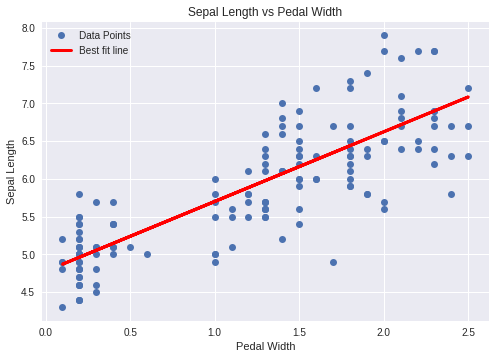

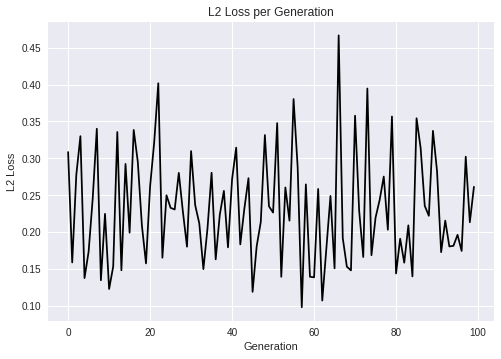

In [15]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line',linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()